In [3]:
import vcf
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from bisect import bisect_left
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.sparse import *
from sklearn.metrics.pairwise import pairwise_distances

# DATA

In [4]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()

In [16]:
target = list(df[(df['lineage']=='AY.12 (Delta-like)')|(df['lineage']=='AY.9 (Delta-like)')|(df['lineage']=='AY.4 (Delta-like)')]['INAB sample ID'])
file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

pos_record = {}

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}
x = list(sor_res.keys())

sor_res_filter = dict(filter(lambda x: x[1] > 1 ,sor_res.items()))
pos2 = list(sor_res_filter.keys())

In [17]:
df2 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df2 = df2.dropna()
target2 = list(df2[(df2['lineage']=='AY.4 (Delta-like)')]['INAB sample ID'])
x2 = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x2.append(tar)

AY4_POS2 = pd.DataFrame(x2)
AY4_POS2.columns = pos2
AY4_POS2['Label'] =0

In [18]:
df3 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df3 = df3.dropna()
target3 = list(df3[(df3['lineage']=='AY.9 (Delta-like)')]['INAB sample ID'])

x3 = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target3:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x3.append(tar)

AY9_POS2 = pd.DataFrame(x3)
AY9_POS2.columns = pos2
AY9_POS2['Label'] =1

In [19]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()
target1 = list(df[(df['lineage']=='AY.12 (Delta-like)')]['INAB sample ID'])

x = []
name1 = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target1:
            name1.append(t[0])
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x.append(tar)
            
AY12_POS2 = pd.DataFrame(x)
AY12_POS2.columns = pos2
AY12_POS2['Label'] = 2

In [2]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()
target5 = list(df[(df['lineage']=='B.1.617.2')]['INAB sample ID'])

x = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target5:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x.append(tar)
            
B16172_POS2 = pd.DataFrame(x)
B16172_POS2.columns = pos2
B16172_POS2['Label'] = 3

NameError: name 'pd' is not defined

In [42]:
b = AY4_POS2.append(AY9_POS2)
fin_data = b.append(AY12_POS2)

fin_data

,23403,28270,28881,14408,3037,22917,16466,22995,26767,28247,...,20055,2258,3569,12056,13701,26625,491,22790,9584,Label
0,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
2,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,3,4,4,4,4,3,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,2
280,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,2
281,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,2
282,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,2


# Adjusted Rand index

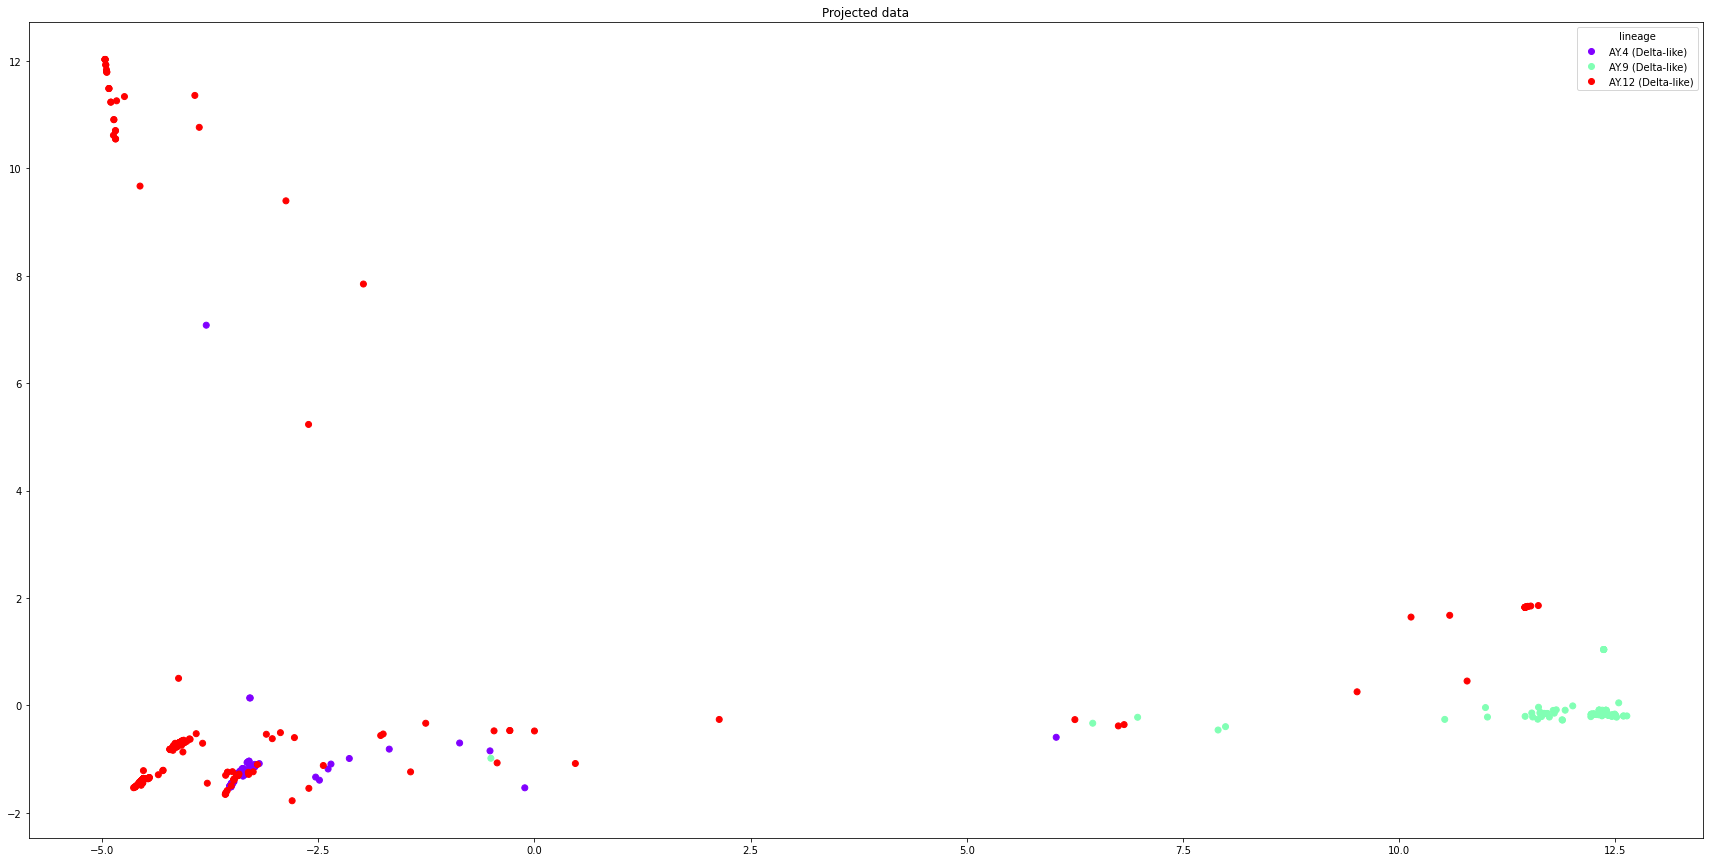

In [43]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(fin_data.iloc[:,:-1])

# Project data onto first two principal components
projX = pca.transform(fin_data.iloc[:,:-1])
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],c=fin_data.iloc[:,-1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = ['AY.4 (Delta-like)','AY.9 (Delta-like)','AY.12 (Delta-like)'],
           title="lineage")
plt.title('Projected data')
plt.show()

In [44]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,random_state=123).fit(fin_data.iloc[:,:-1])
ari=adjusted_rand_score(fin_data.iloc[:,-1], kmeans.labels_)  
print('ARI：%f'%(ari))

ARI：0.370326


# supervised select features

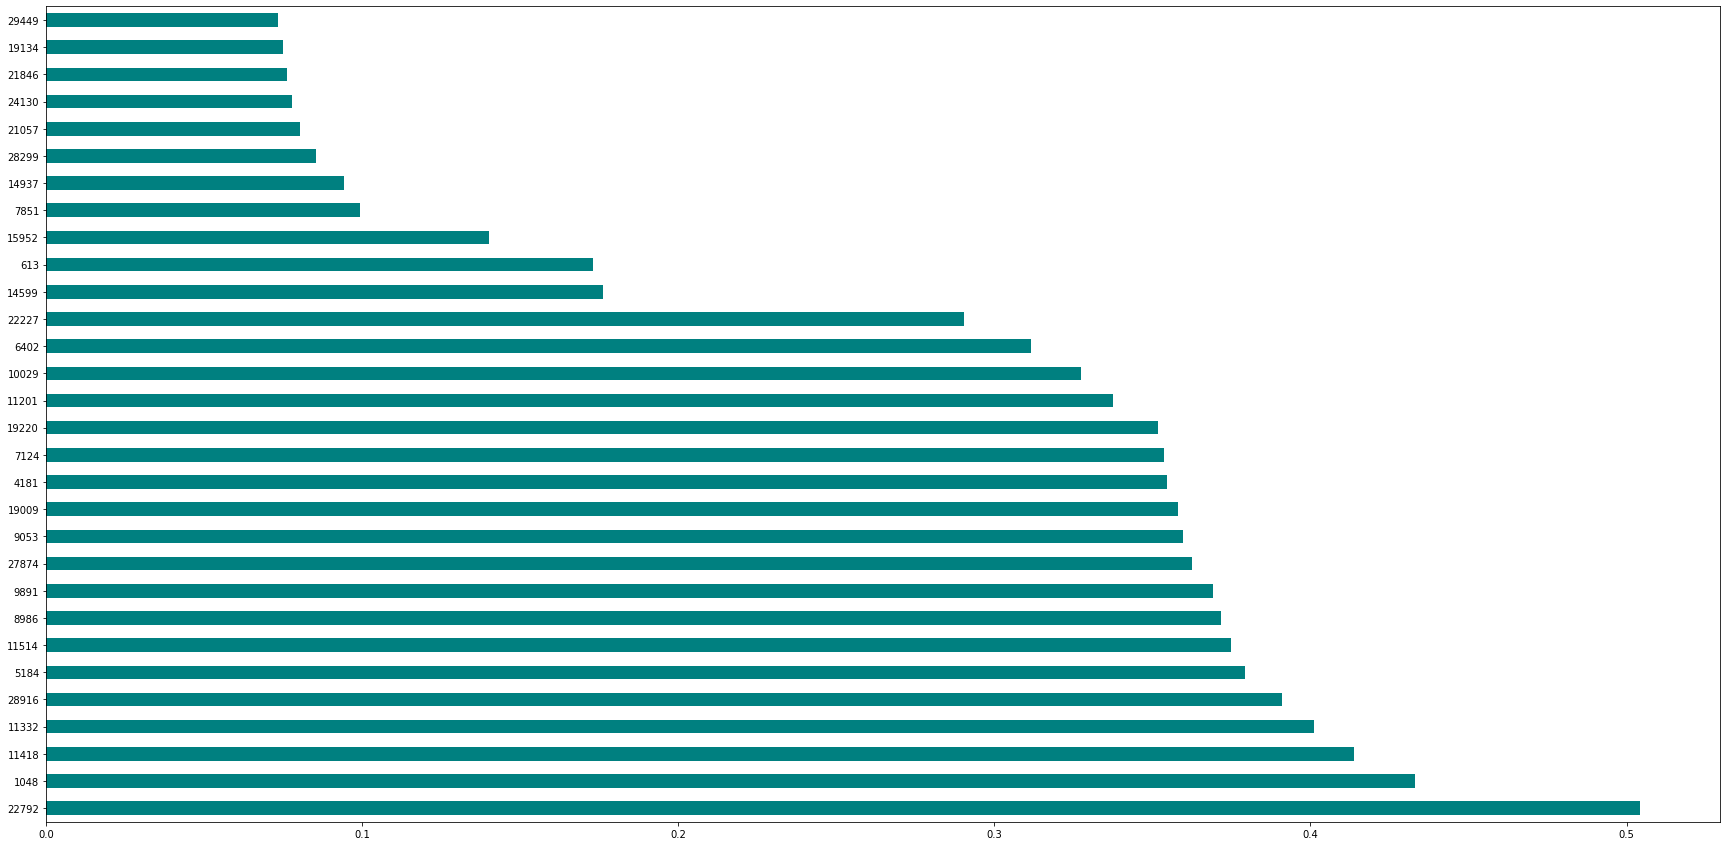

In [60]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importances = mutual_info_classif(fin_data.iloc[:,:-1], fin_data.iloc[:,-1])
feat_importances = pd.Series(importances,fin_data.columns[:-1])
feat_importances_ex =  feat_importances.sort_values(ascending=False)[:30]
plt.figure(figsize=(30,15))
feat_importances_ex.plot(kind= 'barh', color = 'teal')
plt.show()
infor_sel = list(feat_importances[feat_importances>0.16].index)


In [52]:
import_sort = list(feat_importances.sort_values(ascending=False).index)
import_sort

['22792',
 '1048',
 '11514',
 '11332',
 '11201',
 '8986',
 '27874',
 '9053',
 '11418',
 '9891',
 '6402',
 '10029',
 '4181',
 '7124',
 '19220',
 '5184',
 '28916',
 '19009',
 '22227',
 '613',
 '14599',
 '7851',
 '15952',
 '28299',
 '29449',
 '1077',
 '829',
 '835',
 '1758',
 '18744',
 '5392',
 '27526',
 '19245',
 '21057',
 '17193',
 '22310',
 '20940',
 '27745',
 '14030',
 '22112',
 '3700',
 '4321',
 '23946',
 '21',
 '27611',
 '3553',
 '12557',
 '21846',
 '18812',
 '10870',
 '1729',
 '3569',
 '2035',
 '20055',
 '3037',
 '15535',
 '19134',
 '29750',
 '11474',
 '26125',
 '29212',
 '14937',
 '13892',
 '24130',
 '20014',
 '24381',
 '23683',
 '17122',
 '15760',
 '6408',
 '29623',
 '24410',
 '27527',
 '13857',
 '507',
 '7203',
 '26681',
 '4752',
 '29593',
 '6396',
 '26767',
 '3395',
 '13446',
 '11580',
 '29640',
 '94',
 '12488',
 '16466',
 '28461',
 '11338',
 '174',
 '11365',
 '4081',
 '29721',
 '25872',
 '6990',
 '22790',
 '22103',
 '21618',
 '29679',
 '23718',
 '19542',
 '14808',
 '29402',
 '

In [57]:
delta_def = [22028,22029.22030,23402,23403,23404,28143,28144,28145,25468,25469,25470,23603,23604,23605,14381,14382,14383,26766,26767,26768,16439,16440,
16441,28880,28881,28882,21617,21618,21619,29402,29403,29404,15425,15426,15427,22994,22995,22996,28460,28461,28462,22916,22917,22918,24410,
24411,24412,27751,27752,27753,27637,27638,27639,10028,10029,10030,11201,11202,11203,19193,19194,19195,4181,4182,4183,9053,9054,9055,28916,
28917,28918,27873,27874,27875,6401,6402,6403,7124,7125,7126]


pos = []
rank = []
for i in range(len(import_sort)):
    if int(import_sort[i]) in delta_def:
        rank.append(i)
        pos.append(import_sort[i])

pos


['11201',
 '27874',
 '9053',
 '6402',
 '10029',
 '4181',
 '7124',
 '28916',
 '24410',
 '26767',
 '28461',
 '21618',
 '29402',
 '23604',
 '27752',
 '22917',
 '28881',
 '23403',
 '22995',
 '25469',
 '27638',
 '22028']

In [51]:
rank

[4,
 6,
 7,
 10,
 11,
 12,
 13,
 16,
 71,
 80,
 88,
 98,
 103,
 112,
 121,
 128,
 197,
 271,
 300,
 302,
 303,
 307]

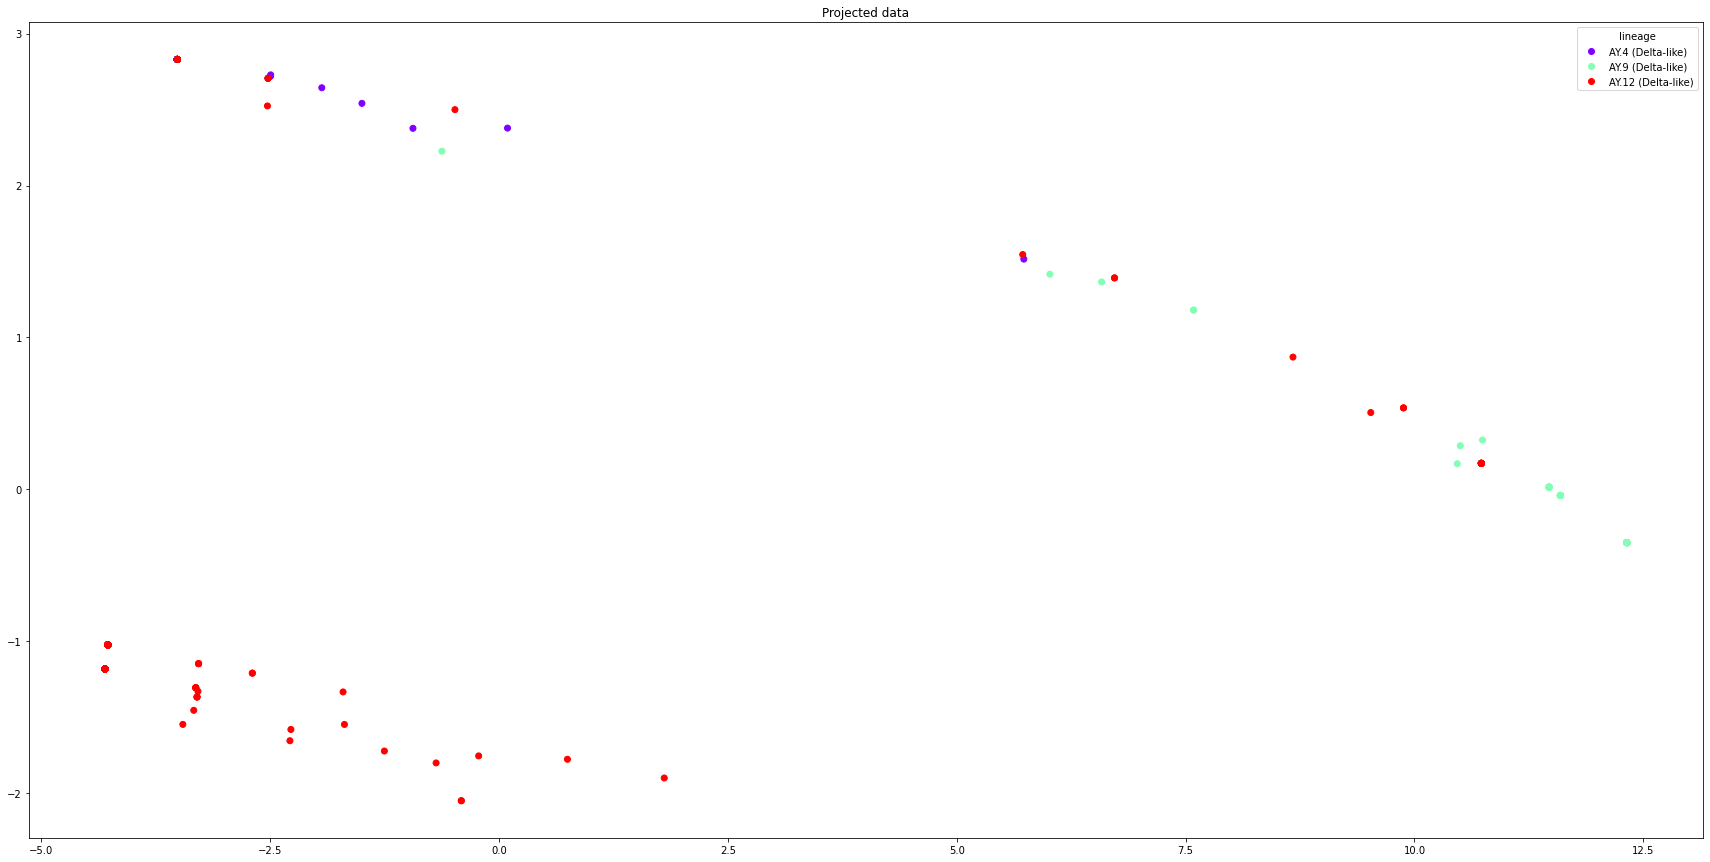

In [25]:
import numpy as np
from sklearn.decomposition import PCA

sel_data = fin_data[infor_sel]
pca = PCA(n_components=2)
pca.fit(sel_data)

# Project data onto first two principal components
projX = pca.transform(sel_data)
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],c=fin_data.iloc[:,-1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = ['AY.4 (Delta-like)','AY.9 (Delta-like)','AY.12 (Delta-like)'],
           title="lineage")
plt.title('Projected data')
plt.show()

In [39]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,random_state=123).fit(sel_data)
ari=adjusted_rand_score(fin_data.iloc[:,-1], kmeans.labels_)  
print('ARI：%f'%(ari))

ARI：0.710436


RandomForestRegressor select feature

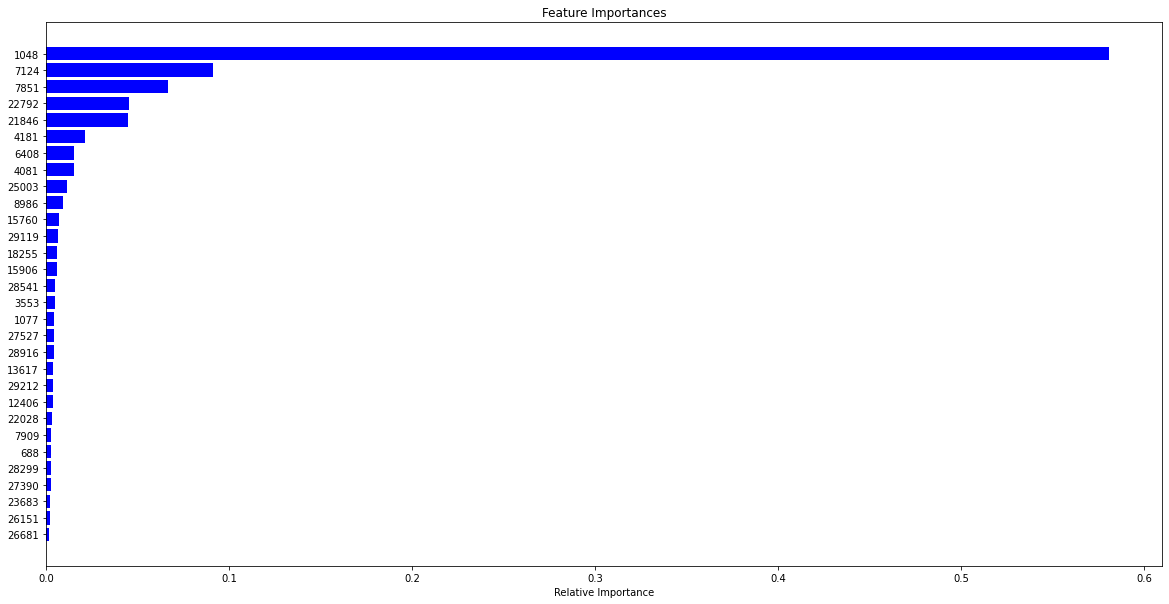

In [62]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
# read the data


model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(fin_data.iloc[:,:-1],fin_data.iloc[:,-1])
#plot the feature importance graph
features = fin_data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]  # top 30 features
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# use the SelectFromModel to selects the features 
feature = SelectFromModel(model)

Fit = feature.fit_transform(fin_data.iloc[:,:-1],fin_data.iloc[:,-1])

In [63]:
ind_sort = list(np.argsort(importances))[::-1]
import_sort = []
for i in ind_sort:
    import_sort.append(features[i])
import_sort

['1048',
 '7124',
 '7851',
 '22792',
 '21846',
 '4181',
 '6408',
 '4081',
 '25003',
 '8986',
 '15760',
 '29119',
 '18255',
 '15906',
 '28541',
 '3553',
 '1077',
 '27527',
 '28916',
 '13617',
 '29212',
 '12406',
 '22028',
 '7909',
 '688',
 '28299',
 '27390',
 '23683',
 '26151',
 '26681',
 '2509',
 '15952',
 '23718',
 '3874',
 '14599',
 '2258',
 '28378',
 '15237',
 '26152',
 '11851',
 '28247',
 '24410',
 '23401',
 '3065',
 '29742',
 '22225',
 '25469',
 '613',
 '26611',
 '16466',
 '10029',
 '21618',
 '829',
 '21057',
 '29593',
 '241',
 '9053',
 '29706',
 '22112',
 '18102',
 '11332',
 '6472',
 '12073',
 '22995',
 '19220',
 '27874',
 '11201',
 '23604',
 '21990',
 '13019',
 '14604',
 '13892',
 '29640',
 '25264',
 '13459',
 '8303',
 '4752',
 '9190',
 '27506',
 '4321',
 '28115',
 '21575',
 '5869',
 '18651',
 '27649',
 '3047',
 '25690',
 '3619',
 '17040',
 '9584',
 '12488',
 '2571',
 '3700',
 '20937',
 '23868',
 '20930',
 '25047',
 '28461',
 '27573',
 '22981',
 '17004',
 '7194',
 '15337',
 '650

In [64]:
pos = []
rank = []
for i in range(len(import_sort)):
    if int(import_sort[i]) in delta_def:
        rank.append(i)
        pos.append(import_sort[i])

pos

['7124',
 '4181',
 '28916',
 '22028',
 '24410',
 '25469',
 '10029',
 '21618',
 '9053',
 '22995',
 '27874',
 '11201',
 '23604',
 '28461',
 '6402',
 '29402',
 '27638',
 '27752',
 '26767',
 '22917',
 '28881',
 '23403']

In [66]:
rank

[1,
 5,
 18,
 22,
 41,
 46,
 50,
 51,
 56,
 63,
 65,
 66,
 67,
 97,
 144,
 145,
 147,
 148,
 150,
 151,
 154,
 368]

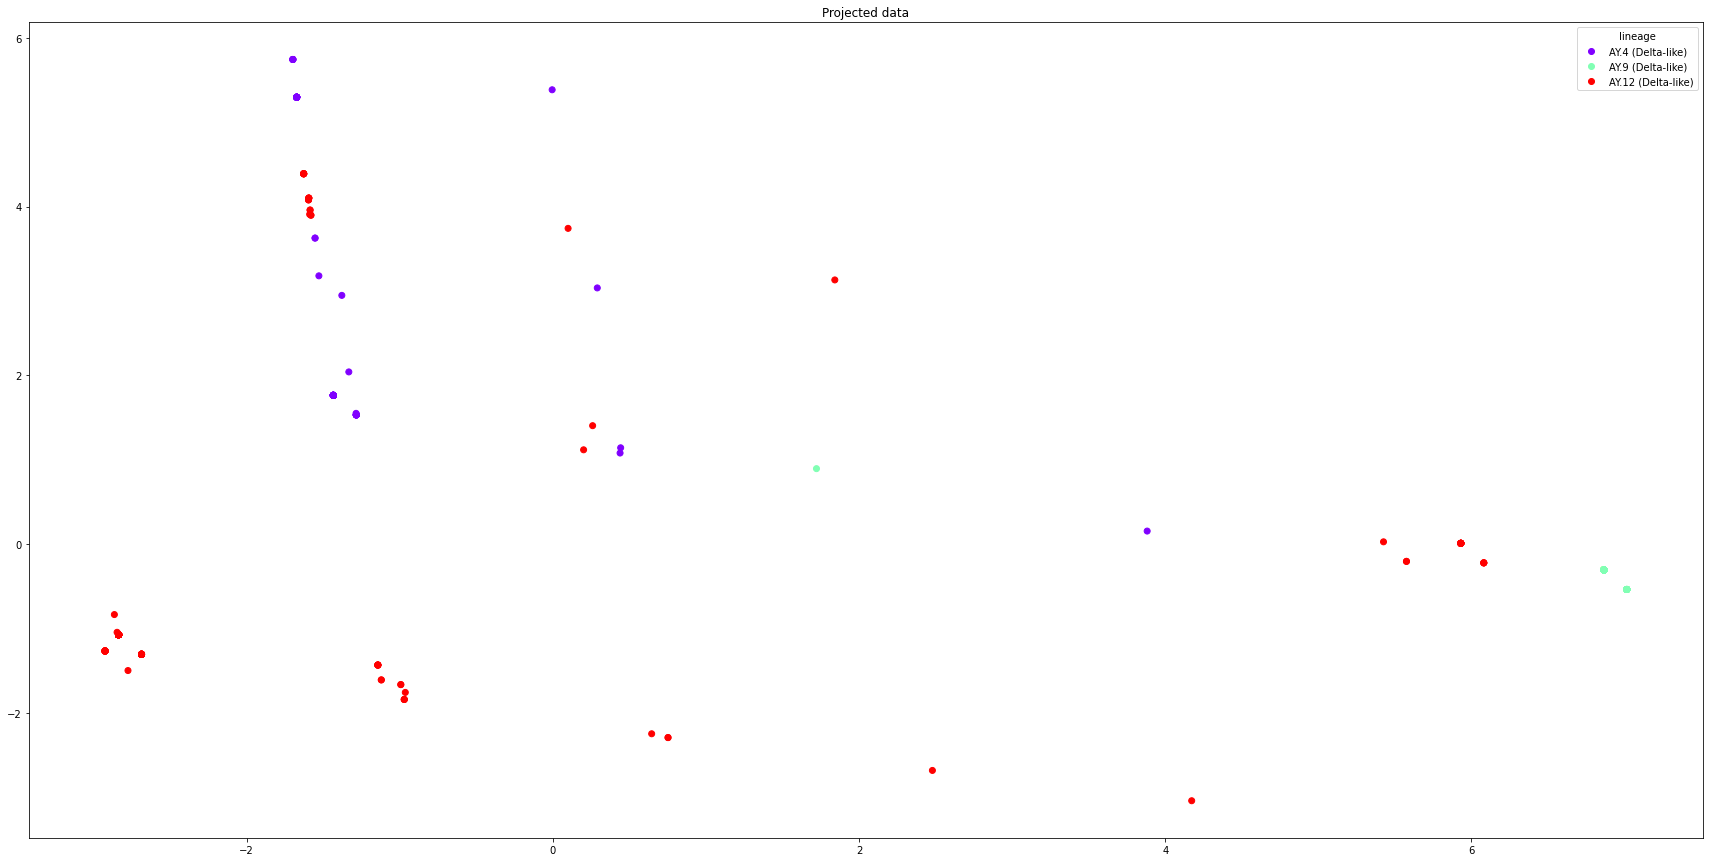

In [37]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Fit)

# Project data onto first two principal components
projX = pca.transform(Fit)
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],c=fin_data.iloc[:,-1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = ['AY.4 (Delta-like)','AY.9 (Delta-like)','AY.12 (Delta-like)'],
           title="lineage")
plt.title('Projected data')
plt.show()

In [38]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,random_state=123).fit(Fit)
ari=adjusted_rand_score(fin_data.iloc[:,-1], kmeans.labels_)  
print('ARI：%f'%(ari))

ARI：0.698108


B.1.1.7

In [18]:
def_mutations = [3267,5388,6954,11288,11289,11290,11291,11292,11293,11294,11295,11296,
                21765,21766,21767,21768,21769,21770,21991,21992,21993,23063,23271,23604
                ,23709,24506,24914,27972,28048,28111,28280,28977]

df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()

file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

pos_record = {}
target2 = list(df[df['lineage']=='B.1.1.7']['INAB sample ID'])
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}
sor_res

{'14408': 1277,
 '23063': 1273,
 '24914': 1273,
 '21990': 1272,
 '16176': 1270,
 '3037': 1269,
 '5388': 1269,
 '23403': 1269,
 '28270': 1267,
 '11287': 1266,
 '23709': 1266,
 '28281': 1266,
 '23604': 1265,
 '28280': 1264,
 '28977': 1264,
 '23271': 1263,
 '28282': 1263,
 '28111': 1262,
 '21764': 1259,
 '15279': 1256,
 '5986': 1251,
 '27972': 1250,
 '28048': 1249,
 '913': 1247,
 '14676': 1246,
 '3267': 1235,
 '24506': 1233,
 '241': 1230,
 '6954': 1225,
 '28881': 1136,
 '28883': 1135,
 '28882': 1134,
 '682': 462,
 '1441': 449,
 '11522': 362,
 '5284': 182,
 '28739': 182,
 '15096': 144,
 '28880': 139,
 '12970': 128,
 '19482': 125,
 '16726': 118,
 '28657': 111,
 '27389': 96,
 '29077': 94,
 '1746': 92,
 '3646': 92,
 '23277': 91,
 '88': 91,
 '27059': 89,
 '3933': 88,
 '29543': 88,
 '11650': 86,
 '11750': 83,
 '12235': 74,
 '2119': 71,
 '905': 70,
 '25638': 70,
 '25026': 70,
 '17733': 65,
 '7684': 64,
 '21807': 63,
 '3706': 63,
 '2272': 63,
 '3728': 63,
 '17502': 63,
 '18384': 63,
 '23084': 63,

In [19]:
sor_res_filter = dict(filter(lambda x: x[1] >= 2,sor_res.items()))
pos2 = list(sor_res_filter.keys())
pos2

['14408',
 '23063',
 '24914',
 '21990',
 '16176',
 '3037',
 '5388',
 '23403',
 '28270',
 '11287',
 '23709',
 '28281',
 '23604',
 '28280',
 '28977',
 '23271',
 '28282',
 '28111',
 '21764',
 '15279',
 '5986',
 '27972',
 '28048',
 '913',
 '14676',
 '3267',
 '24506',
 '241',
 '6954',
 '28881',
 '28883',
 '28882',
 '682',
 '1441',
 '11522',
 '5284',
 '28739',
 '15096',
 '28880',
 '12970',
 '19482',
 '16726',
 '28657',
 '27389',
 '29077',
 '1746',
 '3646',
 '23277',
 '88',
 '27059',
 '3933',
 '29543',
 '11650',
 '11750',
 '12235',
 '2119',
 '905',
 '25638',
 '25026',
 '17733',
 '7684',
 '21807',
 '3706',
 '2272',
 '3728',
 '17502',
 '18384',
 '23084',
 '27754',
 '9443',
 '7063',
 '27220',
 '2221',
 '23419',
 '21575',
 '214',
 '11455',
 '29081',
 '16293',
 '18600',
 '25785',
 '174',
 '11782',
 '18756',
 '22747',
 '15101',
 '18987',
 '9246',
 '26010',
 '16887',
 '5622',
 '13536',
 '25218',
 '27615',
 '25459',
 '2146',
 '24814',
 '21036',
 '28027',
 '2110',
 '14120',
 '7429',
 '17124',
 '27703'

In [20]:
pos2 = list(sor_res_filter.keys())
df2 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df2 = df2.dropna()

x2 = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x2.append(tar)

B117 = pd.DataFrame(x2)
B117.columns = pos2
B117

,14408,23063,24914,21990,16176,3037,5388,23403,28270,11287,...,8240,12374,27987,29440,6706,10646,27261,1839,26158,28665
0,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
2,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
3,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1273,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1274,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,3,0
1275,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Aral\Anaconda3\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


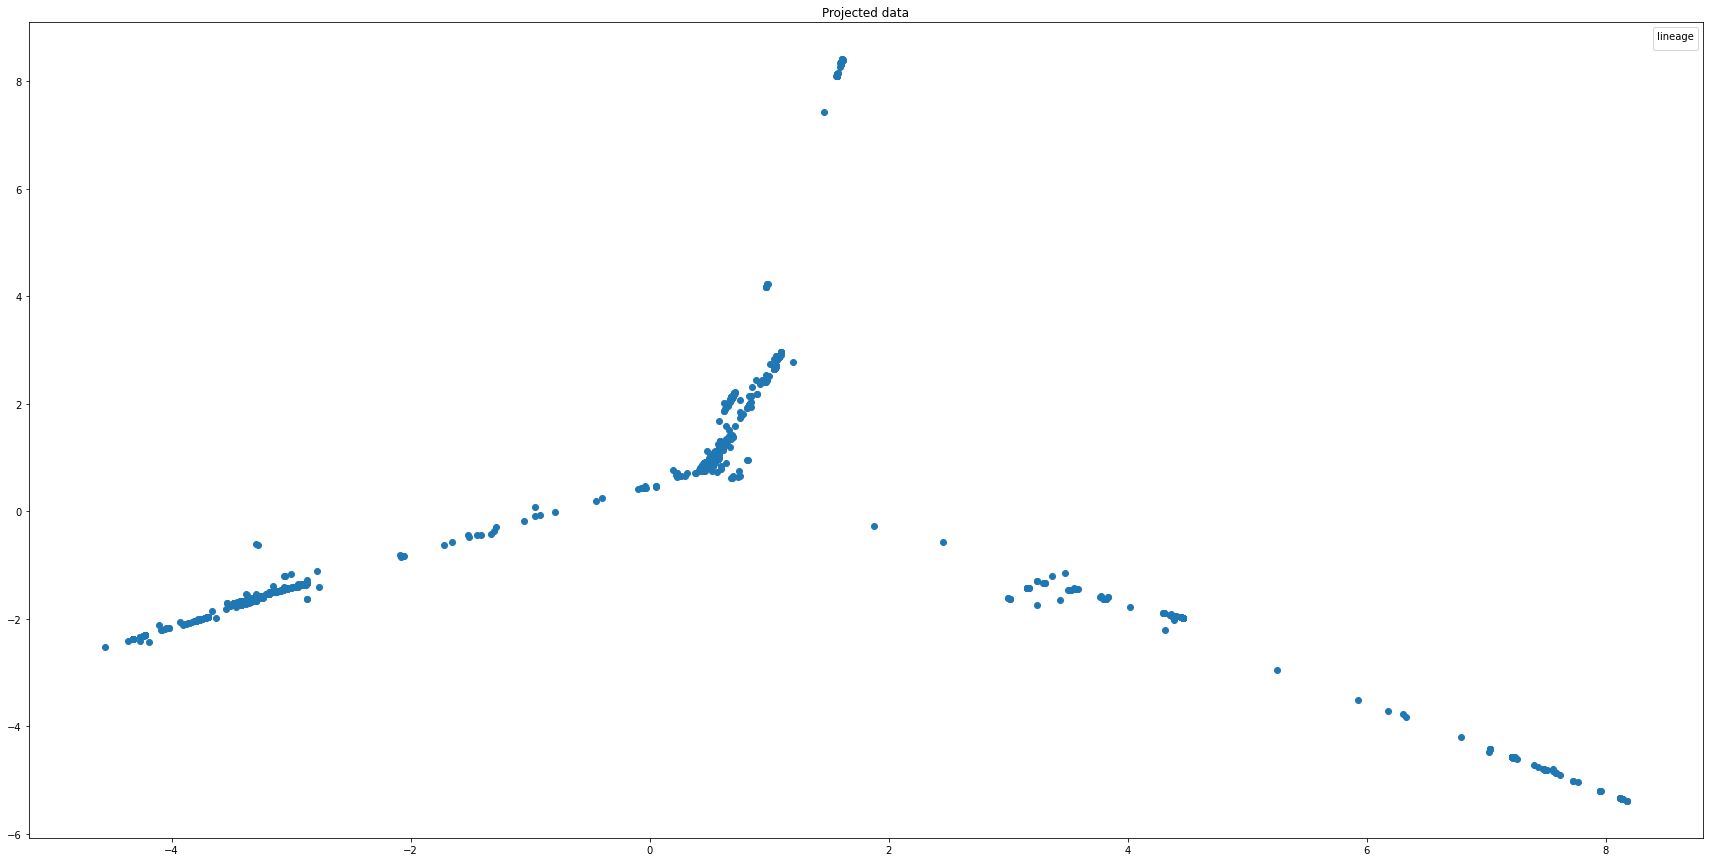

In [21]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(B117.iloc[:,:-1])

# Project data onto first two principal components
projX = pca.transform(B117.iloc[:,:-1])
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = scatter.legend_elements()[1],
           title="lineage")
plt.title('Projected data')
plt.show()